In [117]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd
import pandas as pd

# other possible packages: pysptk, surfboard, torchaudio
import antropy as ant # for entropy computation
from scipy.stats import entropy

import warnings
warnings.filterwarnings("ignore")

import sklearn
import scipy

In [2]:
data_path = "../data"
audio1_path = os.path.join(data_path, "wav/03a01Fa.wav")
audio2_path = os.path.join(data_path, "wav/03a01Nc.wav")
audio3_path = os.path.join(data_path, "wav/03a07Wc.wav")

In [90]:
# load audio data
audio1, sample_rate1 = librosa.load(audio1_path, sr=None) # sr=None to keep consistency with the database at 16kHz
audio2, sample_rate2 = librosa.load(audio2_path, sr=None)
audio3, sample_rate3 = librosa.load(audio3_path, sr=None)

In [92]:
sample_rate1 # -> always the same? read in paper or check here! 
# actually in the paper they say they downsampled to 16kHz but here we have 22.05 kHz; could be due to CD recordings are
# often measured in 44.1 kHz and divisions 22.05 kHz or 11.025 kHz

16000

# Audio loading

In [5]:
ipd.Audio(audio1_path) 

In [6]:
ipd.Audio(audio2_path) 

In [7]:
ipd.Audio(audio3_path) 

# Waveform plotting

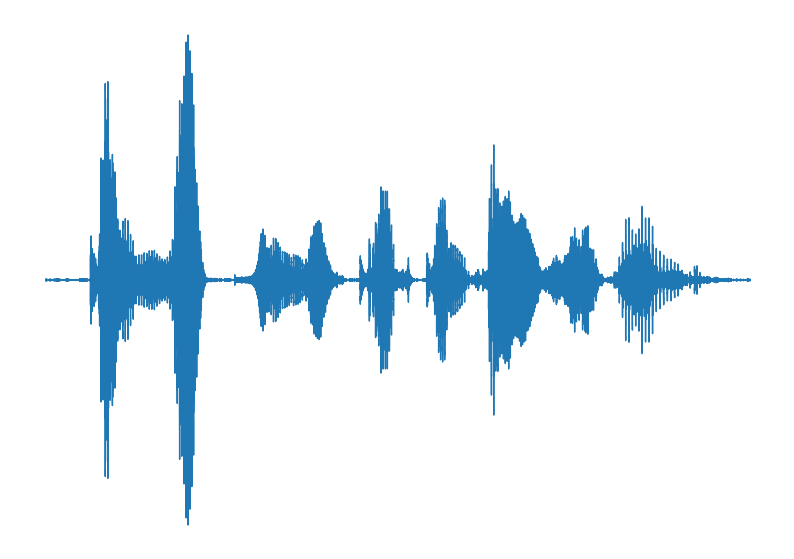

In [86]:
plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(audio1, sr=sample_rate1)
plt.show()

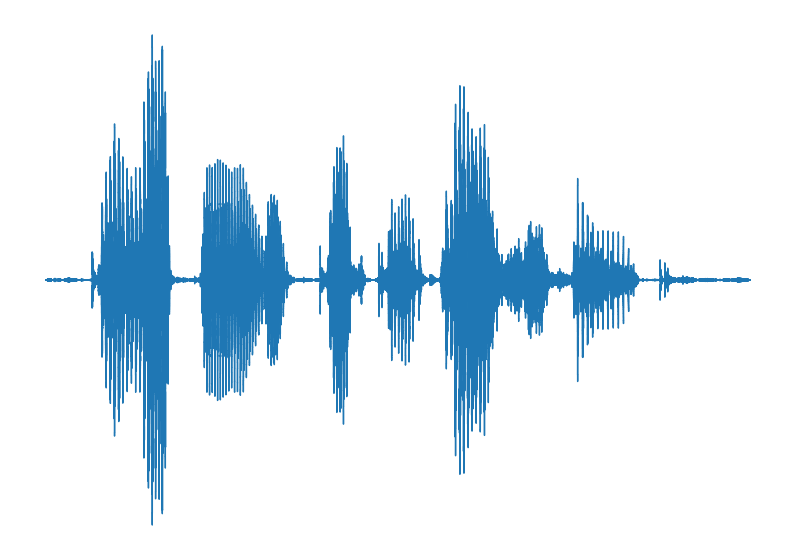

In [9]:
plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(audio2, sr=sample_rate2)
plt.show()

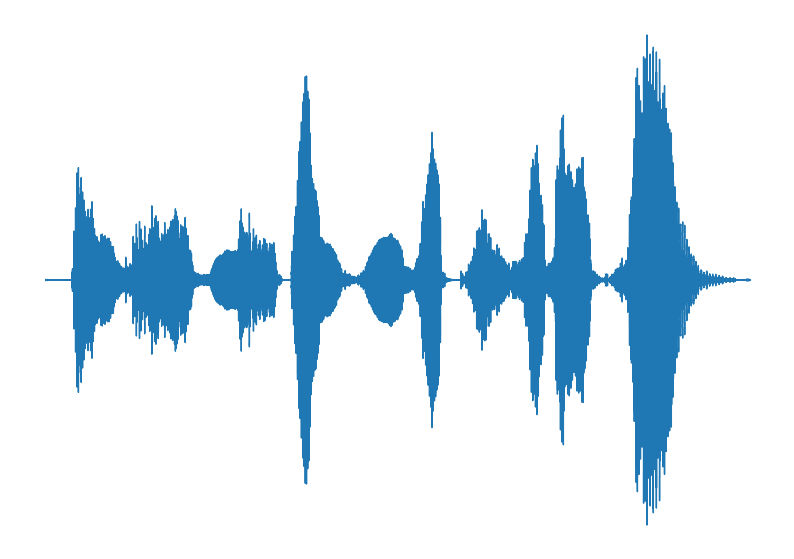

In [10]:
plt.figure(figsize=(10,7))
plt.axis('off')
librosa.display.waveshow(audio3, sr=sample_rate3)
plt.show()

# Harmonic percursive, mono, stereo

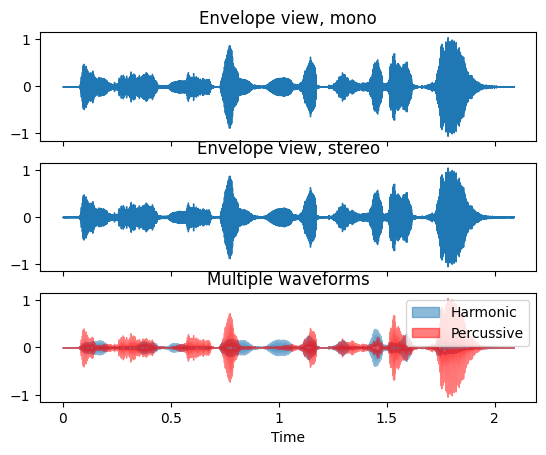

In [11]:
y, sr = librosa.load(audio3_path)
fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[2], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')
ax[2].set(title='Multiple waveforms')
ax[2].legend()

y, sr = librosa.load(audio3_path, mono=False)
librosa.display.waveshow(y, sr=sr, ax=ax[1])
ax[1].set(title='Envelope view, stereo')       # according to Darshit not correct; would need to show two different plots
ax[1].label_outer()

# Spectrogram

In [12]:
def plot_spectrogram(signal, name):
    """Compute power spectrogram with Short-Time Fourier Transform and plot result."""
    spectrogram = librosa.amplitude_to_db(librosa.stft(signal))
    plt.figure(figsize=(20, 15))
    librosa.display.specshow(spectrogram, y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Log-frequency power spectrogram for {name}")
    plt.xlabel("Time")
    plt.show()

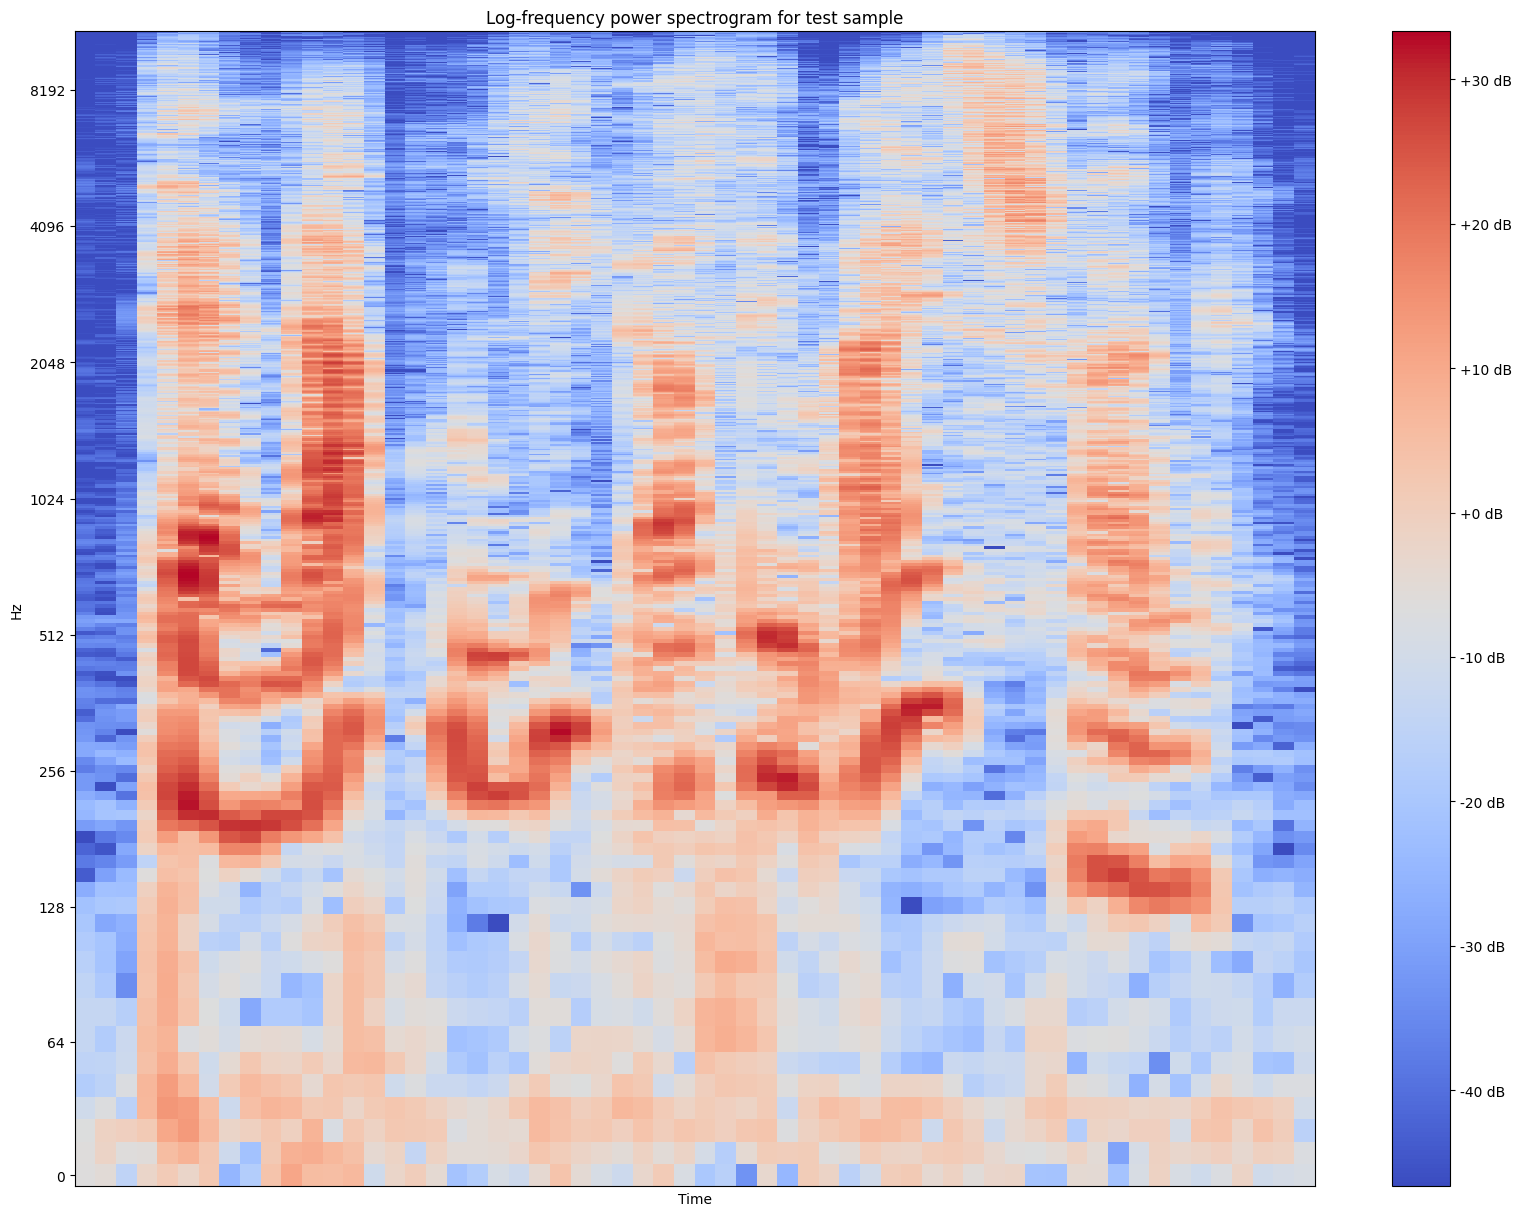

In [267]:
plot_spectrogram(audio1, "test sample")

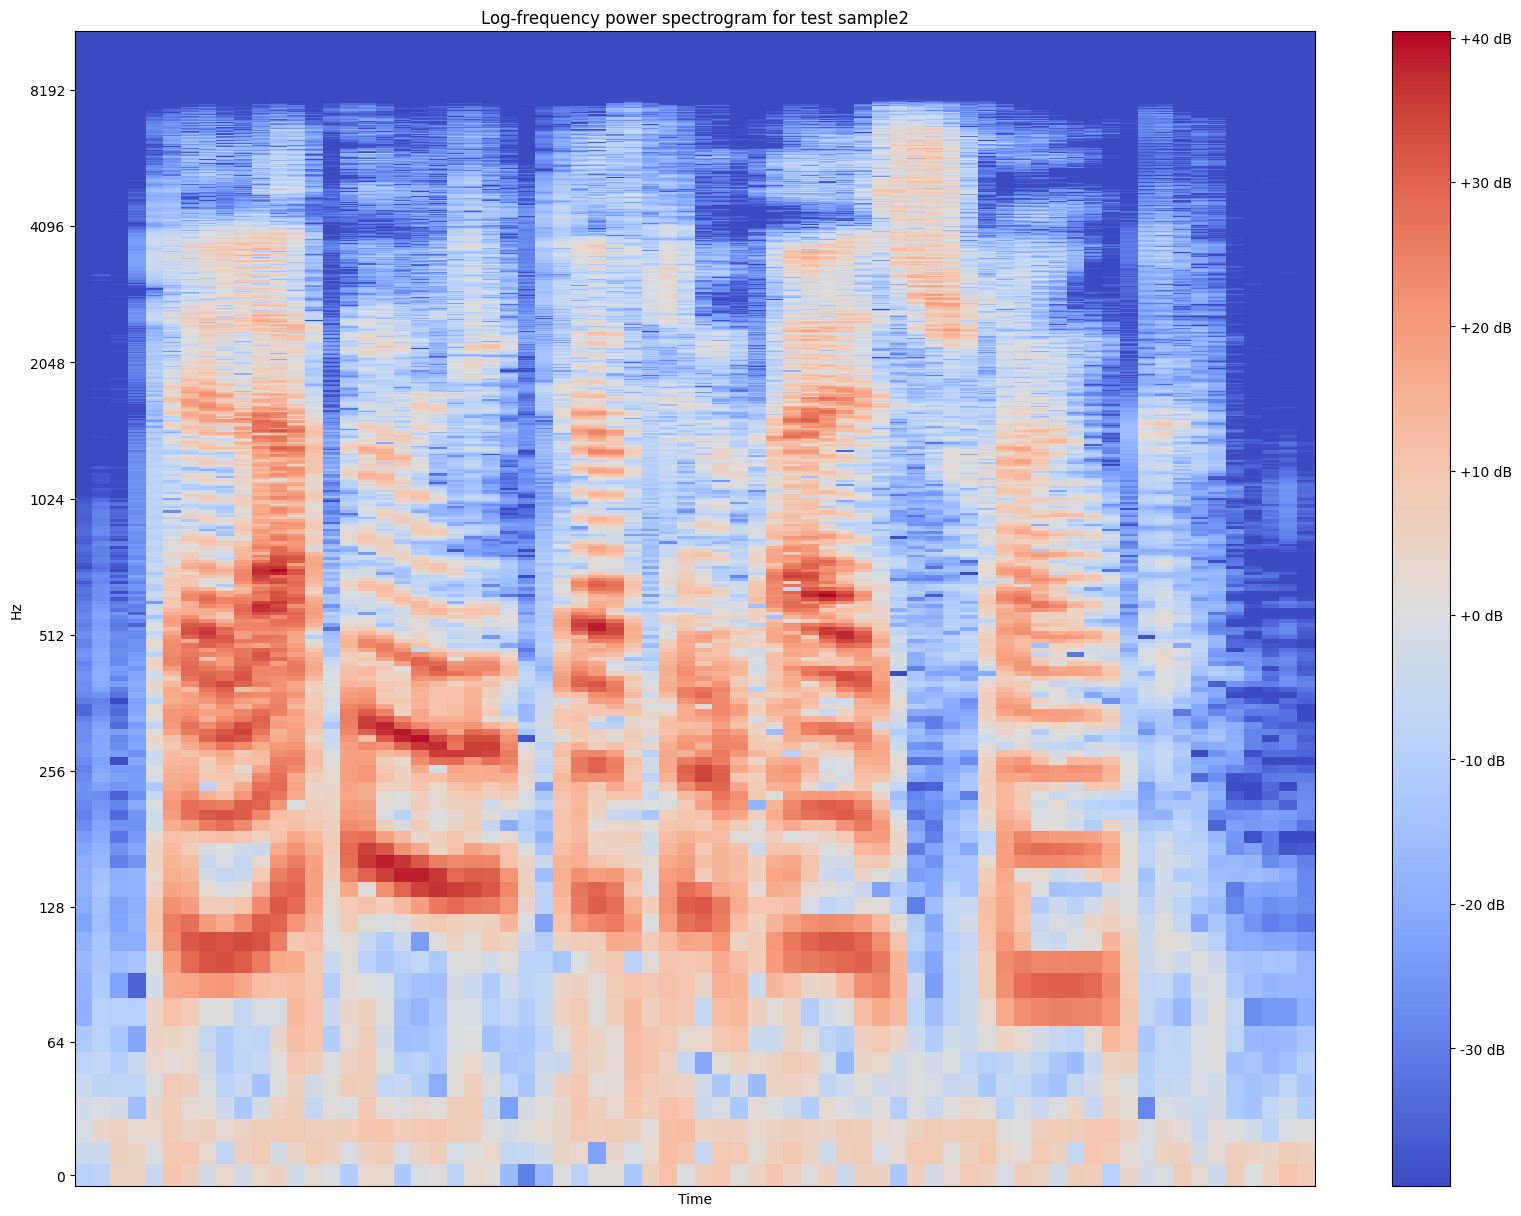

In [14]:
plot_spectrogram(audio2, "test sample2")

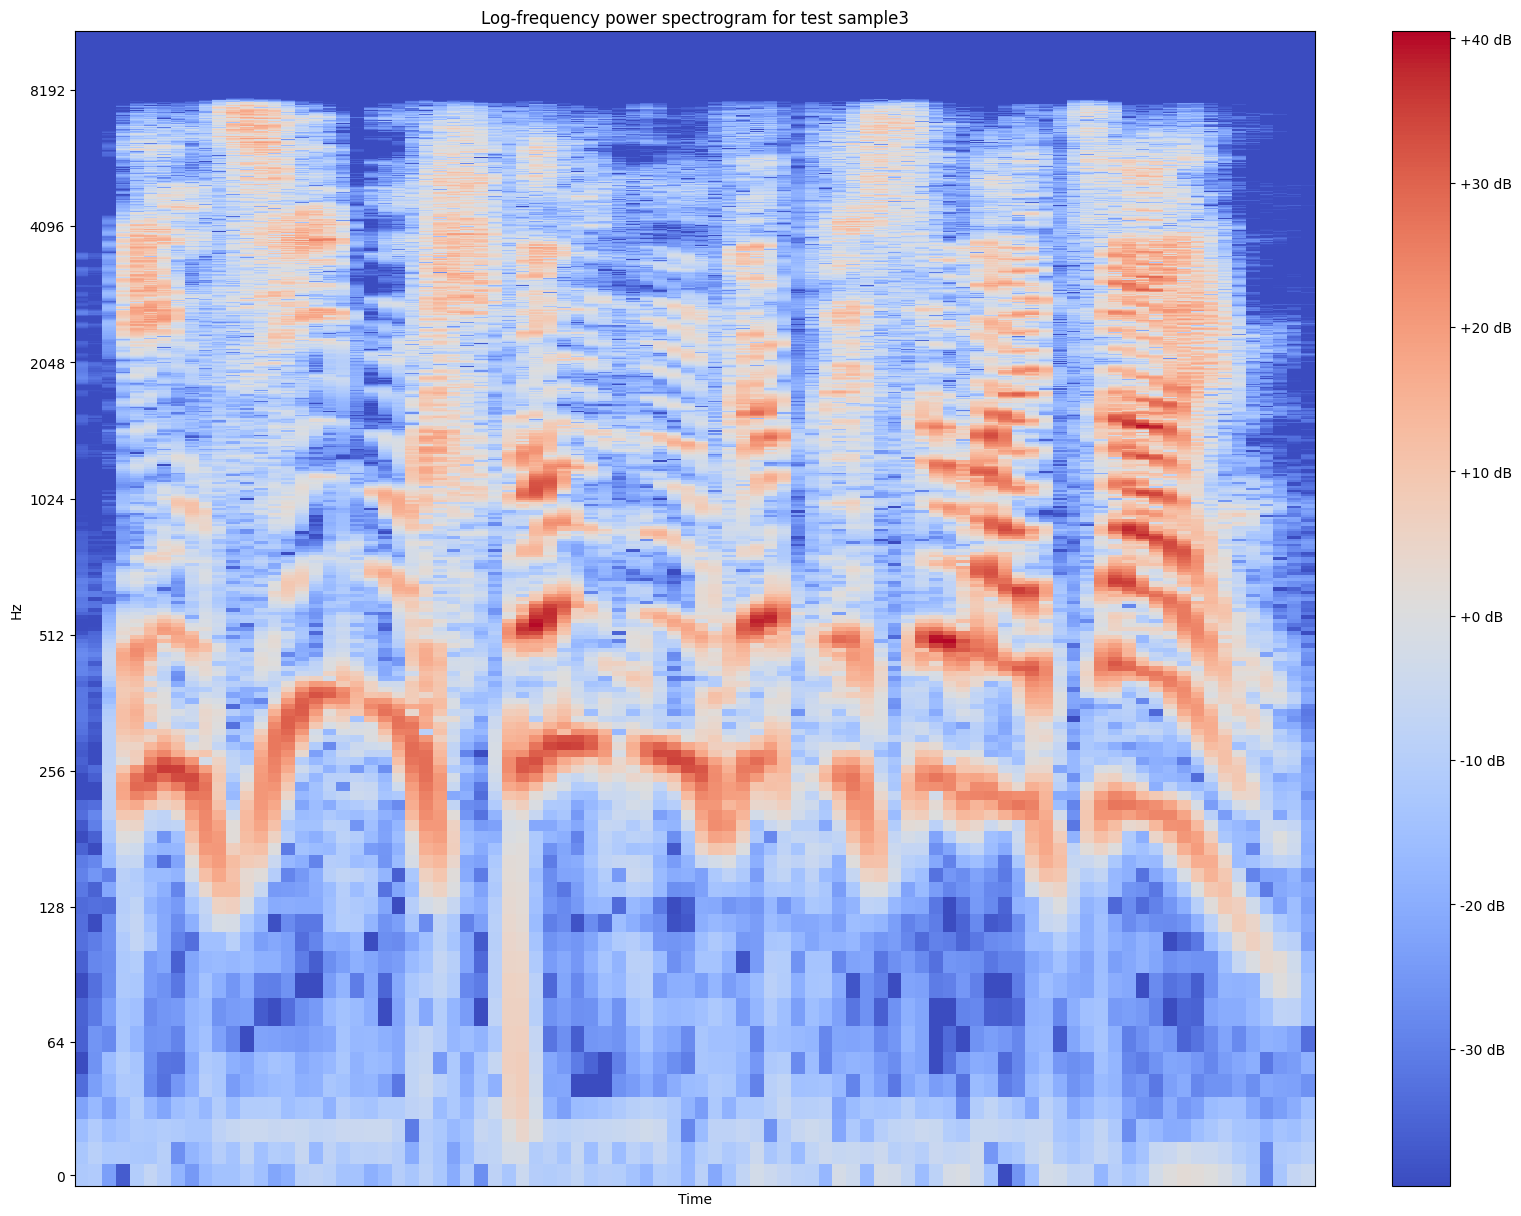

In [15]:
plot_spectrogram(audio3, "test sample3")

In [16]:
librosa.feature.chroma_stft(y=audio1, sr=sample_rate1)

array([[0.93444663, 0.6100306 , 0.62872726, 0.58853376, 0.43836588,
        0.37302265, 0.72770137, 0.60876995, 0.18757756, 0.15453304,
        0.6669064 , 0.74053204, 0.3025914 , 0.24613263, 0.45422995,
        0.11650255, 0.15989363, 0.22838767, 0.23589009, 0.18326393,
        0.8672082 , 0.49799344, 0.19454847, 0.05979111, 0.08232401,
        0.093442  , 0.02137363, 0.00388827, 0.0048637 , 0.0089107 ,
        0.04617546, 0.02890844, 0.02592124, 0.02632438, 0.08082341,
        0.3675803 , 0.25725594, 0.31738424, 0.04879644, 0.10254431,
        0.34305575, 0.49271736, 0.7994773 , 0.91180575, 0.5311978 ,
        0.01821144, 0.00442616, 0.011134  , 0.08924174, 0.5755624 ,
        0.27700353, 0.15172508, 0.26391825, 0.21569368, 0.12272322,
        0.41282913, 1.        , 1.        , 0.77616113, 0.1388679 ,
        0.74127185, 0.9505152 , 0.4083049 , 0.15588711, 0.15960325,
        0.12251142, 0.3600821 , 0.24073985, 0.20228463, 0.37022993,
        0.50265366, 0.17677873, 0.0173884 , 0.02

In [17]:
librosa.feature.melspectrogram(y=audio1, sr=sample_rate1)

array([[1.0677721e-02, 2.9677214e-02, 4.1329917e-02, ..., 1.3041709e-01,
        6.0334899e-02, 1.3437546e-02],
       [6.0990024e-03, 4.0542455e-03, 2.5989630e-03, ..., 6.7272345e-03,
        7.4613462e-03, 1.1390247e-02],
       [3.0280044e-03, 1.7488347e-03, 2.9354234e-04, ..., 3.5673783e-03,
        3.5584774e-03, 3.1496880e-03],
       ...,
       [2.2437059e-10, 5.6218509e-11, 1.5414272e-17, ..., 4.3745606e-17,
        7.2025913e-11, 2.3716977e-08],
       [1.8196623e-10, 4.5691912e-11, 2.1472043e-18, ..., 1.9891636e-17,
        7.0553105e-11, 2.3225430e-08],
       [1.5718032e-10, 3.9537436e-11, 2.1577573e-18, ..., 1.1964407e-17,
        6.9633833e-11, 2.2919052e-08]], dtype=float32)

In [18]:
librosa.feature.tonnetz(y=audio1, sr=sample_rate1)

array([[-2.54346130e-02, -1.16977078e-02, -6.67656684e-03,
        -3.67343185e-04,  3.47166036e-03,  3.88812903e-03,
         5.81213594e-03, -1.78950944e-02, -1.22536204e-02,
         1.11729260e-02, -8.44720306e-03,  4.57041036e-02,
         1.11998998e-01,  1.24710004e-01,  8.80779372e-02,
         8.24719186e-02,  4.02516795e-02,  1.73949710e-02,
         5.99191162e-03,  1.52190801e-02,  1.22398047e-02,
        -8.89754903e-03, -9.64897818e-03, -5.29611718e-03,
         8.01462361e-03,  2.96829884e-02,  6.21591801e-02,
         1.02926938e-01,  1.27658618e-01,  9.98196270e-02,
         6.62622216e-02,  2.96509212e-02, -5.52604321e-04,
        -3.09076071e-02, -2.89844757e-02, -3.43699762e-02,
        -1.71826189e-02, -1.05553187e-03,  1.50871116e-02,
         6.82447333e-02, -3.31841870e-02, -1.40175873e-02,
         9.88621134e-03, -2.56660022e-02, -5.18586679e-02,
        -5.17906468e-02, -4.85106041e-02, -5.66485650e-02,
        -5.27889913e-02, -3.60622497e-02, -1.96286811e-0

In [19]:
librosa.feature.zero_crossing_rate(y=audio1)

array([[0.00341797, 0.02148438, 0.03955078, 0.04296875, 0.09130859,
        0.09130859, 0.08691406, 0.09570312, 0.05908203, 0.04736328,
        0.03808594, 0.03173828, 0.0234375 , 0.02539062, 0.03710938,
        0.05419922, 0.0703125 , 0.07763672, 0.06298828, 0.04199219,
        0.02539062, 0.03222656, 0.04394531, 0.046875  , 0.04492188,
        0.02978516, 0.02490234, 0.03125   , 0.0390625 , 0.04394531,
        0.04443359, 0.04199219, 0.07763672, 0.10205078, 0.10058594,
        0.11230469, 0.08349609, 0.06494141, 0.078125  , 0.10253906,
        0.17382812, 0.16748047, 0.14892578, 0.13818359, 0.05664062,
        0.05224609, 0.05566406, 0.02929688, 0.04296875, 0.05957031,
        0.078125  , 0.09472656, 0.09277344, 0.08349609, 0.07421875,
        0.05712891, 0.07958984, 0.19921875, 0.31347656, 0.41357422,
        0.46728516, 0.4140625 , 0.36376953, 0.29736328, 0.25146484,
        0.20166016, 0.14160156, 0.11962891, 0.08496094, 0.06787109,
        0.05419922, 0.03955078, 0.02392578, 0.01

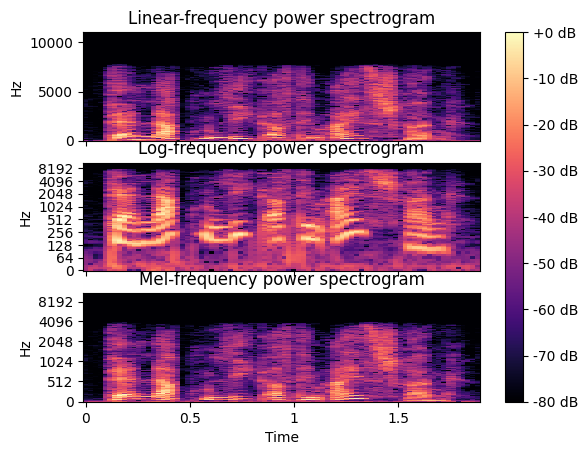

In [20]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio1)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sample_rate1, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 512
D = librosa.amplitude_to_db(np.abs(librosa.stft(audio1, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sample_rate1, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()

librosa.display.specshow(D, y_axis='mel', sr=sample_rate1, hop_length=hop_length,
                         x_axis='time', ax=ax[2])
ax[2].set(title='Mel-frequency power spectrogram')
ax[2].label_outer()

fig.colorbar(img, ax=ax, format="%+2.f dB")
plt.show()

# Function for applying to all files

In [285]:
# function for importing all wav files
audio_files = os.listdir(os.path.join(data_path, 'wav/'))

speaker_num_list = []
label_list = []
duration_list = []
zcr_list = []
mean_list = []
median_list = []
max_list = []
min_list = []

for audio_file in audio_files:
    audio_path = os.path.join(data_path, 'wav', audio_file)
    
    # load audio data
    y, sr = librosa.load(audio_path, sr=None)  
    
    
    """
    #### Naming conventions ####

    Every utterance is named according to the same scheme:
    Positions 1-2: number of speaker
    Positions 3-5: code for text
    Position 6: emotion (sorry, letter stands for german emotion word)
    Position 7: if there are more than two versions these are numbered a, b, c ....
    Example: 03a01Fa.wav is the audio file from Speaker 03 speaking text a01 with the emotion "Freude" (Happiness).
    """
    
    # get speaker number
    speaker_num_list.append(audio_file[:2])
    
    # get emotional label (use all versions?)
    label_dict = {'W':'anger', 'L':'boredom', 'E':'disgust', 'A':'fear', 'F':'happiness', 'T':'sadness', 'N':'neutral'}
    label_list.append(label_dict[audio_file[5]])
    
    # get duration 
    duration_list.append(librosa.get_duration(y=y, sr=sr)) # hop length & frame length are already correct (512, 2048)
    
    # zero-crossing rate
    zcr_list.append(librosa.feature.zero_crossing_rate(y=y)[0])
    
    # mean
    mean_list.append(np.mean(np.abs(y)))
    
    # median
    median_list.append(np.median(np.abs(y)))
    
    # max
    max_list.append(np.max(y))
    
    # min
    min_list.append(np.min(y))    
    

df = pd.DataFrame({'file':audio_files, 'speaker':speaker_num_list, 'emotion':label_list, 'duration':duration_list, 'zcr':zcr_list, 'mean':mean_list,
                   'median':median_list, 'max':max_list, 'min':min_list})

 # get speaker gender based on number
df['gender'] = 'female'
df['gender'][df['speaker'].isin(['03', '10', '11', '12', '15'])] = 'male'

In [296]:
df

file speaker    emotion  duration  \
0    03a01Fa.wav      03  happiness  1.898250   
1    03a01Nc.wav      03    neutral  1.611250   
2    03a01Wa.wav      03      anger  1.877813   
3    03a02Fc.wav      03  happiness  2.006250   
4    03a02Nc.wav      03    neutral  1.439812   
..           ...     ...        ...       ...   
530  16b10Lb.wav      16    boredom  3.442687   
531  16b10Tb.wav      16    sadness  3.500625   
532  16b10Td.wav      16    sadness  3.934188   
533  16b10Wa.wav      16      anger  2.414125   
534  16b10Wb.wav      16      anger  2.522500   

                                                   zcr      mean    median  \
0    [0.0185546875, 0.03662109375, 0.0615234375, 0....  0.043271  0.017822   
1    [0.005859375, 0.01171875, 0.03662109375, 0.046...  0.066645  0.019135   
2    [0.01513671875, 0.02880859375, 0.05322265625, ...  0.067903  0.024933   
3    [0.0439453125, 0.076171875, 0.09765625, 0.0927...  0.069940  0.027802   
4    [0.0068359375, 0.01171875, 0.033203125, 0.0415...  0.085794  0.028595   
..                                                 ...       ...       ...   
530  [0.01708984375, 0.021484375, 0.06494140625, 0....  0.075159  0.040314   
531  [0.00634765625, 0.02880859375, 0.08251953125, ...  0.109661  0.040649   
532  [0.01025390625, 0.0166015625, 0.10595703125, 0...  0.071876  0.027283   
533  [0.1015625, 0.15771484375, 0.2421875, 0.206542...  0.027512  0.011047   
534  [0.05859375, 0.13134765625, 0.1572265625, 0.17...  0.054634  0.024231   

          max       min  gender  
0    0.999969 -0.811890    male  
1    0.935303 -0.999847    male  
2    0.975800 -0.999969    male  
3    0.999634 -0.924469    male  
4    0.889465 -0.999847    male  
..        ...       ...     ...  
530  0.788452 -0.999969  female  
531  0.999969 -0.840179  female  
532  0.999969 -0.619659  female  
533  0.999969 -0.425629  female  
534  0.999908 -0.596344  female  

[535 rows x 10 columns]

In [23]:
df['mean'].describe()

count    535.000000
mean       0.076094
std        0.025480
min        0.026387
25%        0.057499
50%        0.071909
75%        0.090182
max        0.178859
Name: mean, dtype: float64

In [24]:
df['median'].describe()

count    535.000000
mean       0.037429
std        0.018537
min        0.008441
25%        0.024141
50%        0.032136
75%        0.047414
max        0.119993
Name: median, dtype: float64

In [25]:
df['max'].describe()

count    535.000000
mean       0.912942
std        0.132703
min        0.502740
25%        0.839754
50%        0.980192
75%        1.005573
max        1.093990
Name: max, dtype: float64

-> values are very different for the files! means it's hard to get a threshold value valid for all files -> therefore idea is to use mean of abs value as threshold

In [26]:
df.groupby('emotion').describe()

duration                                                    \
             count      mean       std       min       25%       50%   
emotion                                                                
anger        127.0  2.640816  0.728804  1.465850  2.090113  2.609887   
boredom       81.0  2.779001  0.804448  1.520091  2.074694  2.690567   
disgust       46.0  3.352856  1.073298  1.523855  2.552868  3.117211   
fear          69.0  2.233399  0.637359  1.225533  1.607982  2.081315   
happiness     71.0  2.543992  0.682695  1.481406  1.963651  2.463583   
neutral       79.0  2.359260  0.659166  1.430839  1.769773  2.235510   
sadness       62.0  4.052917  1.532624  1.735692  3.076361  3.863379   

                                mean            ...       max            \
                75%       max  count      mean  ...       75%       max   
emotion                                         ...                       
anger      3.116961  5.213515  127.0  0.057089  ...  1.019768  1.066536   
boredom    3.398776  4.525850   81.0  0.093790  ...  0.976765  1.022574   
disgust    3.943798  5.963855   46.0  0.076771  ...  1.000994  1.080715   
fear       2.711791  4.101406   69.0  0.080473  ...  1.003266  1.088129   
happiness  3.106848  3.930975   71.0  0.064852  ...  1.007921  1.093990   
neutral    2.822041  3.899229   79.0  0.086386  ...  1.002005  1.056015   
sadness    5.102392  8.978277   62.0  0.086286  ...  0.992619  1.090131   

             min                                                              \
           count      mean       std       min       25%       50%       75%   
emotion                                                                        
anger      127.0 -0.865689  0.145273 -1.070614 -0.986011 -0.918154 -0.756611   
boredom     81.0 -0.968740  0.070027 -1.026165 -1.003433 -0.998943 -0.985640   
disgust     46.0 -0.970636  0.075539 -1.033571 -1.007286 -0.998931 -0.984160   
fear        69.0 -0.970038  0.071762 -1.101940 -1.006907 -0.998415 -0.967243   
happiness   71.0 -0.874879  0.150463 -1.033788 -0.997457 -0.925463 -0.803188   
neutral     79.0 -0.930693  0.108225 -1.036698 -1.004525 -0.991746 -0.867835   
sadness     62.0 -0.966281  0.086964 -1.025660 -1.003413 -1.000232 -0.990063   

                     
                max  
emotion              
anger     -0.417251  
boredom   -0.717614  
disgust   -0.700909  
fear      -0.679772  
happiness -0.486334  
neutral   -0.579905  
sadness   -0.627526  

[7 rows x 40 columns]

In [27]:
duration = librosa.get_duration(y=audio2, sr=sample_rate2)
duration

1.6112925170068026

In [28]:
df['zcr_len'] = df['zcr'].str.len() # zcr have different lengths -> obviously because they have different durations

In [29]:
df

file    emotion  duration  \
0    03a01Fa.wav  happiness  1.898277   
1    03a01Nc.wav    neutral  1.611293   
2    03a01Wa.wav      anger  1.877823   
3    03a02Fc.wav  happiness  2.006259   
4    03a02Nc.wav    neutral  1.439819   
..           ...        ...       ...   
530  16b10Lb.wav    boredom  3.442721   
531  16b10Tb.wav    sadness  3.500635   
532  16b10Td.wav    sadness  3.934195   
533  16b10Wa.wav      anger  2.414150   
534  16b10Wb.wav      anger  2.522540   

                                                   zcr      mean    median  \
0    [0.00341796875, 0.021484375, 0.03955078125, 0....  0.043283  0.017788   
1    [0.005859375, 0.005859375, 0.0126953125, 0.027...  0.066612  0.018966   
2    [0.00830078125, 0.02197265625, 0.03076171875, ...  0.067925  0.024976   
3    [0.03515625, 0.05615234375, 0.07861328125, 0.0...  0.069904  0.027631   
4    [0.0068359375, 0.0068359375, 0.0078125, 0.0273...  0.085804  0.028618   
..                                                 ...       ...       ...   
530  [0.0166015625, 0.01904296875, 0.0234375, 0.039...  0.075134  0.040253   
531  [0.0, 0.02001953125, 0.03369140625, 0.04638671...  0.109530  0.040504   
532  [0.00830078125, 0.01220703125, 0.01220703125, ...  0.071857  0.027320   
533  [0.06982421875, 0.099609375, 0.14892578125, 0....  0.027512  0.011024   
534  [0.04541015625, 0.099609375, 0.15234375, 0.159...  0.054632  0.024204   

          max       min  zcr_len  
0    0.989185 -0.793622       82  
1    0.940210 -1.000460       70  
2    1.008495 -1.011148       81  
3    1.011801 -0.921925       87  
4    0.891944 -0.998372       63  
..        ...       ...      ...  
530  0.788838 -0.999903      149  
531  0.928428 -0.846430      151  
532  1.024189 -0.627526      170  
533  1.038615 -0.417251      104  
534  1.035536 -0.597347      109  

[535 rows x 9 columns]

# Energy

In [30]:
# overall magnitude of a signal corresponds to its energy.
def RMS_energy(y, hop_length=512, frame_length=2048):
    return librosa.feature.rms(y=y, hop_length=hop_length, frame_length=frame_length)[0]

In [31]:
rms=RMS_energy(audio1)

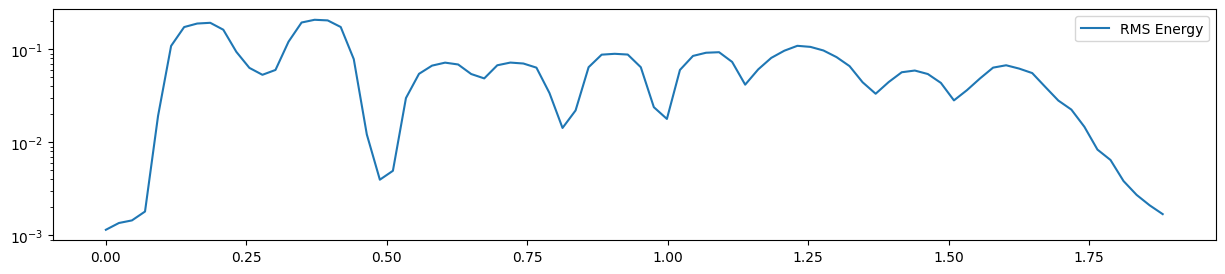

In [32]:
# Plot the RMS energy
plt.figure(figsize=(15, 3))
times = librosa.times_like(rms)
plt.semilogy(times, rms, label='RMS Energy')
plt.legend()
plt.show()

In [33]:
def energy2(x, hop_length=512, frame_length=2048):
    energy_2 = np.array([sum(abs(x[i:i+frame_length]**2)) for i in range(0, len(x), hop_length)])
    return (energy_2 - np.min(energy_2)) / (np.max(energy_2) - np.min(energy_2))

In [34]:
# detailed computation of feature vector length (number of frames on which we compute the features)
# source for understanding: https://superkogito.github.io/blog/2020/01/25/signal_framing.html
def feature_length_computation(y, sf, hop_length=512, frame_length=2048):
    duration = librosa.get_duration(y=y, sr=sr)
    
    # padding
    padding = [(0, 0) for _ in range(y.ndim)]
    padding[-1] = (int(frame_length // 2), int(frame_length // 2)) # (1024, 1024)
    # Pads with the edge values of array with 1024 padded to the edges of each axis
    y = np.pad(y, padding, mode="edge") # -> len(y) from 41857 to 43905 for audio1
    
    overall_samples = len(y) # 43905 for audio1
    overlap = frame_length - hop_length
    frames = int((overall_samples - overlap) / hop_length)
    return frames

In [228]:
feature_length_computation(audio1, sample_rate1)

60

In [229]:
feature_length_computation(audio2, sample_rate2)

70

In [230]:
def normalize(x):
    return sklearn.preprocessing.MinMaxScaler().fit_transform(np.array(x).reshape(-1,1))

In [172]:
# function to visualize different features across the wave signal
def feature_visualization(y, sf, features, title=None, base=2, sure_threshold=0.05, hop_length=512, frame_length=2048):
    t = librosa.frames_to_time(range(feature_length_computation(y, sf, hop_length=hop_length, frame_length=frame_length)
                                    ), hop_length=hop_length)
    
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(y, alpha=0.5)
    if 'spectral_entropy' in features:
        plt.plot(t, spectral_entropy(y, sf), label='spectral_entropy')
    if 'shannon_entropy' in features:
        plt.plot(t, shannon_entropy(y, base=base), label='shannon_entropy')
    if 'rms' in features:
        plt.plot(t, RMS_energy(y), label='rms_energy')
    if 'rms_log' in features:
        plt.plot(t, RMS_log_entropy(y), label='log rms')
    if 'ae' in features:
        plt.plot(t, amplitude_envelope(y), label='amplitude_envelope')
    if 'zcr' in features: 
        print(f"Overall number of zero crossings: {sum(librosa.zero_crossings(y))}")
        plt.plot(t, ZCR(y), color="r", label='zcr')
    if 'energy2' in features: # not necessary -> chose rms for norm energy
        plt.plot(t, energy2(y), label='energy2')
    if 'threshold_entropy' in features:
        plt.plot(t, threshold_entropy(y), label='threshold_entropy')
    if 'log_energy_entropy' in features:
        plt.plot(t, log_energy_entropy(y), label='log_energy_entropy')
    if 'sure_entropy' in features: 
        plt.plot(t, sure_entropy(y, threshold=sure_threshold), label='sure_entropy')
    if 'energy' in features:
        plt.plot(t, energy(y), label='energy')
    
    
    plt.ylim((-1, 1))
    plt.xlim((t[0],t[-1]))
    plt.legend()
    plt.title(title)
    plt.show()

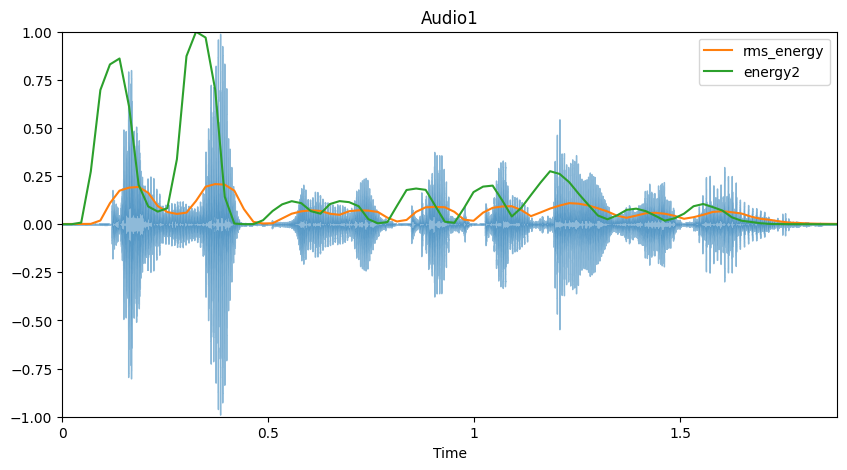

In [38]:
feature_visualization(audio1, sample_rate1, ['energy2', 'rms'], 'Audio1')

very similar! -> can use rms energy where $ RMS = \sqrt{\frac{1}{N} \sum{|x|}^2}$ which is actually like the L2-Norm; energy is usually defined as the total magnitude of the signal which would be $energy = \sum{|x|}^2$

In [39]:
def RMS_log_entropy(y, hop_length=512, frame_length=2048):
    S, phase = librosa.magphase(librosa.stft(y)) # separate spectrogram in magnitude and phase
    return librosa.feature.rms(S=S)[0]

[Text(0.5, 1.0, 'log Power spectrogram')]

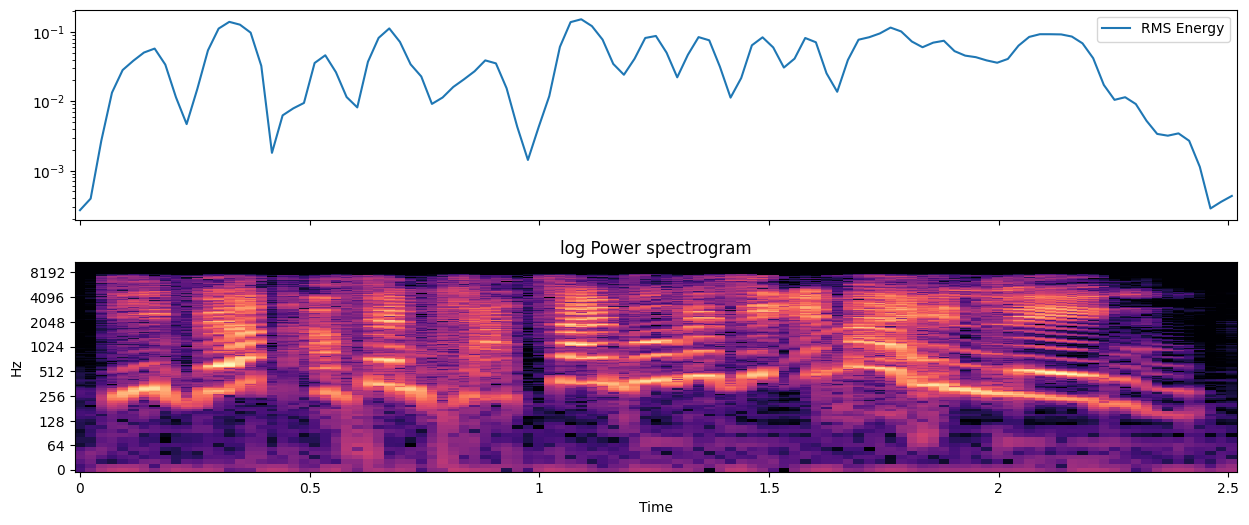

In [40]:
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)[0]

# Plot the RMS energy
fig, ax = plt.subplots(figsize=(15, 6), nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms, label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [41]:
def amplitude_envelope(y, frame_length=2048, hop_length=512):
  return np.array([max(y[i:i+frame_length]) for i in range(0, y.size, hop_length)])

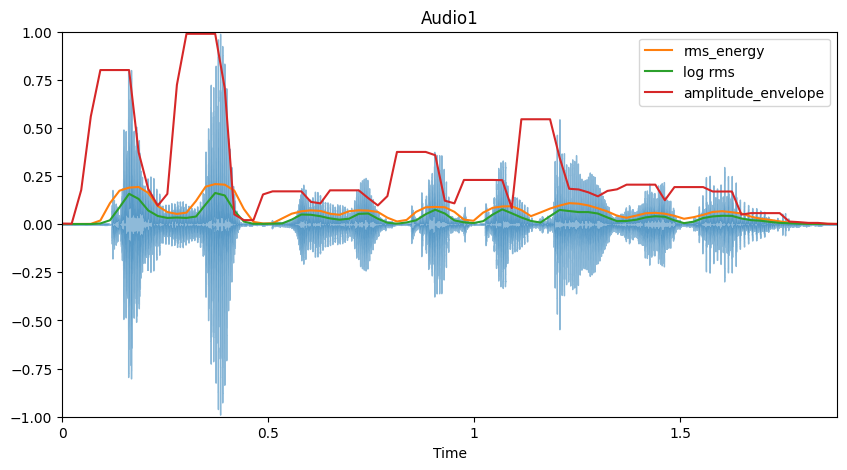

In [42]:
feature_visualization(audio1, sample_rate1, ['rms', 'rms_log', 'ae'], 'Audio1')

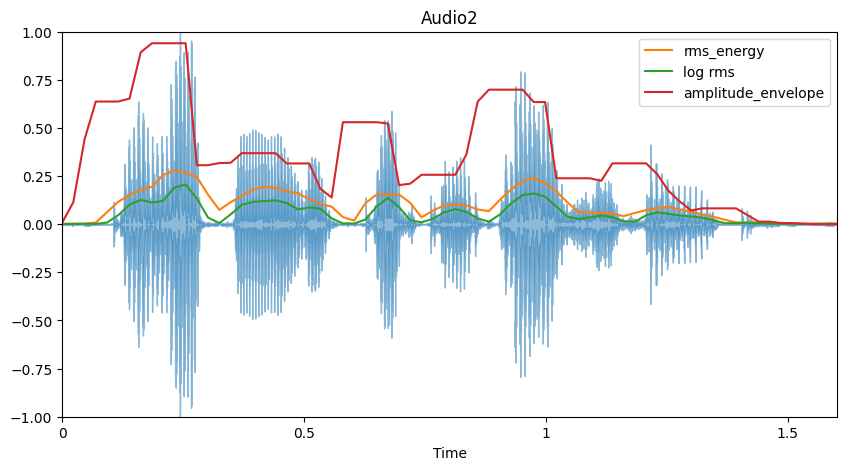

In [43]:
feature_visualization(audio2, sample_rate2, ['rms', 'rms_log', 'ae'], 'Audio2')

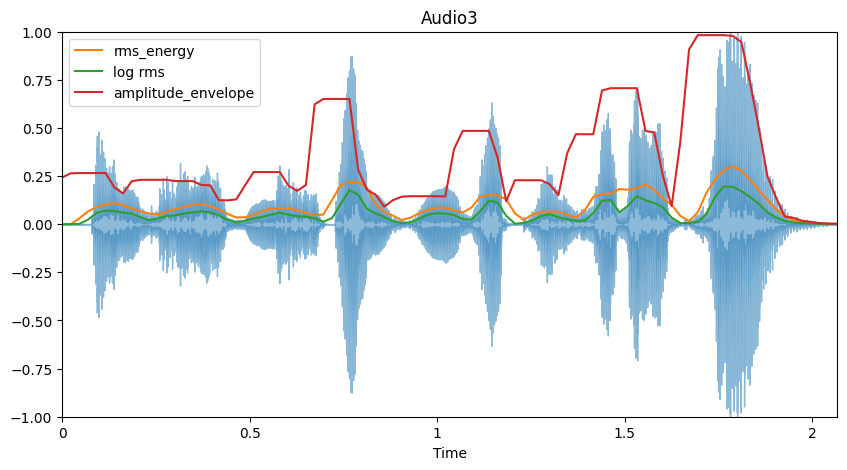

In [44]:
feature_visualization(audio3, sample_rate3, ['rms', 'rms_log', 'ae'], 'Audio3')

In [45]:
# function for zero crossing rate
# rate at which a signal changes from positive to zero to negative or from negative to zero to positive
# how often does signal cross 0/horizontal axis?
def ZCR(y, frame_length=2048, hop_length=512):
    return librosa.feature.zero_crossing_rate(y=y, frame_length=frame_length, hop_length=hop_length)[0]

Overall number of zero crossings: 3987


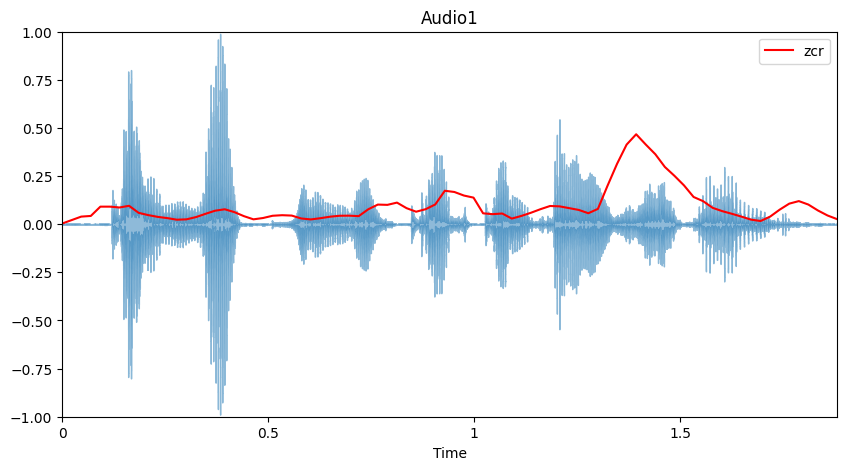

In [46]:
feature_visualization(audio1, sample_rate1, ['zcr'], 'Audio1')

Overall number of zero crossings: 2357


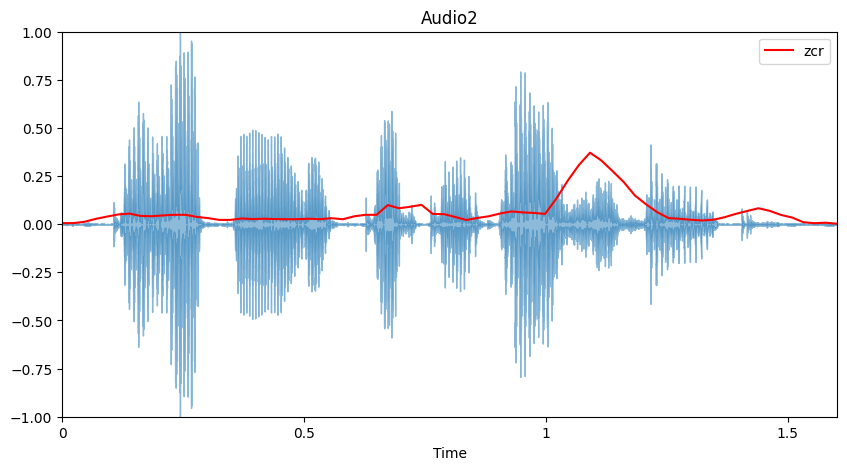

In [47]:
feature_visualization(audio2, sample_rate2, ['zcr'], 'Audio2')

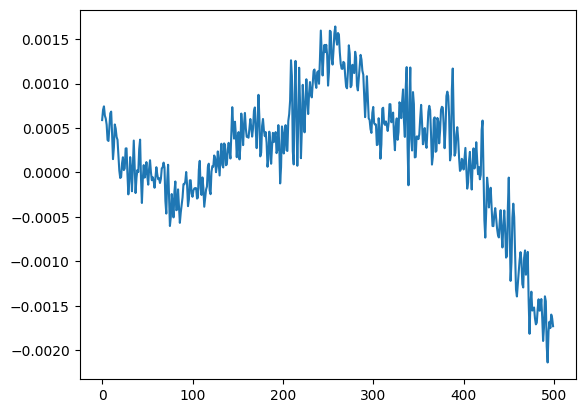

In [48]:
# zoom in
plt.plot(audio1[1500:2000])
plt.show()

In [49]:
zero_crossings = librosa.zero_crossings(audio1[1500:2000], pad=False) # actual number of zero crossing within that chosen frame
print(sum(zero_crossings))

43


# Entropy
## Spectral Entropy

In [50]:
# from source code librosa generate frames
def frames_gen(y, center=True, frame_length=2048, hop_length=512, pad_mode="constant"):
    if y is not None:
        if center:
            padding = [(0, 0) for _ in range(y.ndim)]
            padding[-1] = (int(frame_length // 2), int(frame_length // 2))
            y = np.pad(y, padding, mode=pad_mode)
            
    return librosa.util.frame(y, frame_length=frame_length, hop_length=hop_length) 

In [51]:
# function for computation of spectral entropy
'''
    Spectral Entropy is defined to be the Shannon entropy of the power
    spectral density (PSD) of the data:
    .. math:: H(x, sf) =  -\\sum_{f=0}^{f_s/2} P(f) \\log_2[P(f)]
    Where :math:`P` is the normalised PSD, and :math:`f_s` is the sampling frequency.
'''

def spectral_entropy(y, sf, center=True):
    frames = frames_gen(y, center=center)
    frames = np.transpose(frames)
    spectral = [ant.spectral_entropy(frame, sf=sf, method='welch', normalize=True) for frame in frames]   
    return spectral

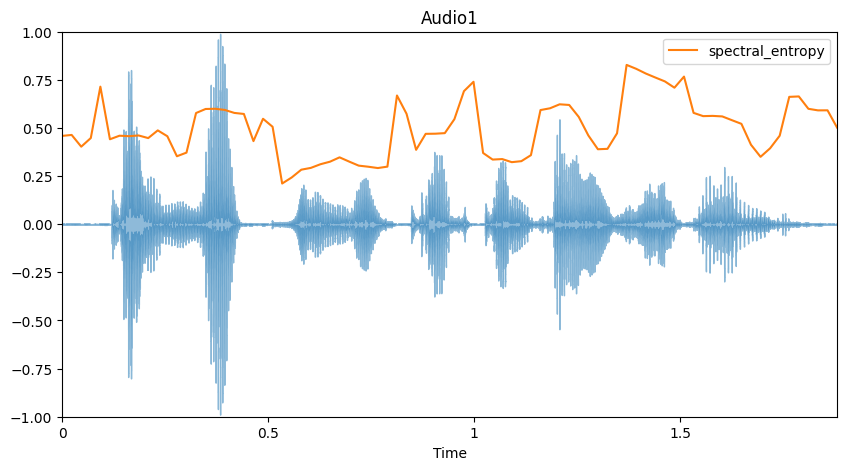

In [52]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy'], 'Audio1')

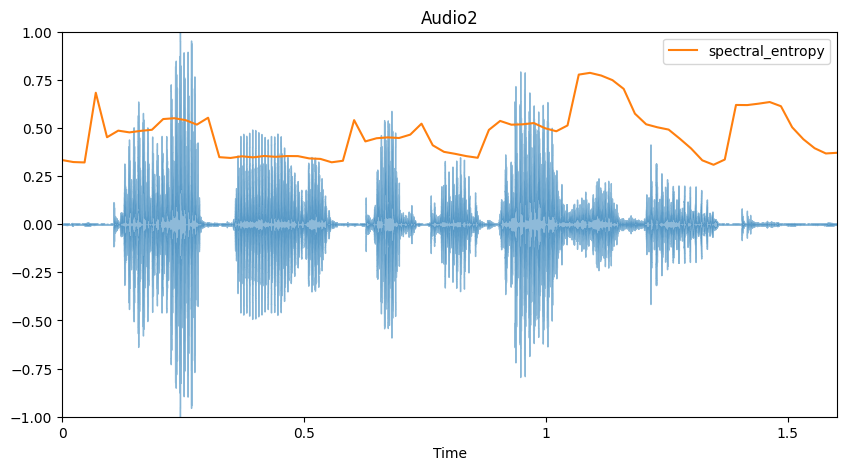

In [53]:
feature_visualization(audio2, sample_rate2, ['spectral_entropy'], 'Audio2')

In [54]:
# understand zero crossing rate (feature computation) form source code
y = audio1
frame_length = 2048
hop_length = 512

padding = [(0, 0) for _ in range(y.ndim)]
padding[-1] = (int(frame_length // 2), int(frame_length // 2))
y = np.pad(y, padding, mode="edge") 

y_framed = librosa.util.frame(y, frame_length=frame_length, hop_length=hop_length)

crossings = librosa.zero_crossings(y_framed, axis=-2, pad=False)

zcrate = np.mean(crossings, axis=-2, keepdims=True)

In [55]:
len(y)

43905

In [56]:
np.unique(np.transpose(crossings)[0], return_counts=True)

(array([False,  True]), array([2041,    7], dtype=int64))

In [57]:
np.transpose(zcrate)[0]

array([0.00341797])

In [58]:
print(np.unique(np.transpose(crossings)[1], return_counts=True))
print(np.transpose(zcrate)[1])

(array([False,  True]), array([2004,   44], dtype=int64))
[0.02148438]


-> zcr is approximately # of True / # of False, i.e. for frame 0: 7/2041 = 0.003

**Auffällig**: rms benutzt pad mode "constant" und zcr pad mode "edge" -> for spectral, pad mode "constant" benutzt

## Log Entropy

In [59]:
from pyAudioAnalysis import ShortTermFeatures

In [60]:
features, feature_names = ShortTermFeatures.feature_extraction(audio1, sample_rate1, window=2048, step=512, deltas=True)

Padding fehlt hier leider! (siehe Länge eines features)

In [61]:
features_df = pd.DataFrame(np.transpose(features), columns = feature_names)

In [62]:
features_df

zcr    energy  energy_entropy  spectral_centroid  spectral_spread  \
0   0.021006  0.000002        3.073395           0.192248         0.221622   
1   0.028334  0.000003        2.992183           0.189832         0.223267   
2   0.075721  0.000381        0.975051           0.243679         0.184166   
3   0.089399  0.012174        1.150653           0.154482         0.186764   
4   0.091842  0.030996        2.148035           0.136144         0.156729   
..       ...       ...             ...                ...              ...   
73  0.077675  0.000222        2.633131           0.145443         0.173978   
74  0.113825  0.000071        2.773962           0.179420         0.170670   
75  0.128969  0.000042        2.526331           0.192200         0.139262   
76  0.106986  0.000015        2.935837           0.202493         0.158357   
77  0.077186  0.000008        2.799584           0.206802         0.189225   

    spectral_entropy  spectral_flux  spectral_rolloff     mfcc_1    mfcc_2  \
0           0.241103       0.000000          0.008789 -37.611744  1.918771   
1           0.141409       0.008231          0.002930 -38.573920  1.725460   
2           2.151217       0.028114          0.344727 -27.745506  0.988554   
3           0.551606       0.004220          0.061523 -23.006287  2.564875   
4           0.484994       0.002326          0.058594 -21.967657  2.226707   
..               ...            ...               ...        ...       ...   
73          0.678579       0.003038          0.159180 -28.628794  1.958311   
74          1.387091       0.002513          0.190430 -29.493783  1.002354   
75          1.532822       0.001127          0.211914 -30.637647  0.031348   
76          1.575785       0.002076          0.214844 -33.094454  0.302949   
77          1.273937       0.001788          0.175781 -34.312161  0.479844   

    ...  delta chroma_4  delta chroma_5  delta chroma_6  delta chroma_7  \
0   ...        0.000000        0.000000        0.000000        0.000000   
1   ...       -0.153974       -0.001650       -0.014820       -0.000252   
2   ...        0.014508        0.003363        0.007951        0.004114   
3   ...       -0.026804        0.006141       -0.000893       -0.000475   
4   ...        0.002180       -0.007651       -0.004063        0.010979   
..  ...             ...             ...             ...             ...   
73  ...        0.034567        0.012323        0.007425       -0.007042   
74  ...        0.030682       -0.011590        0.002358       -0.003780   
75  ...        0.016035        0.000334       -0.009177        0.000933   
76  ...        0.136041       -0.002637       -0.001485       -0.000639   
77  ...        0.042918        0.000196       -0.001304       -0.000357   

    delta chroma_8  delta chroma_9  delta chroma_10  delta chroma_11  \
0         0.000000        0.000000         0.000000         0.000000   
1        -0.002156        0.079960        -0.000283        -0.002208   
2        -0.000386       -0.066234         0.005992         0.012889   
3         0.015688       -0.012805         0.034637         0.008454   
4         0.000088       -0.012410        -0.021277        -0.016742   
..             ...             ...              ...              ...   
73        0.001153        0.004744         0.000646         0.040764   
74        0.001072        0.002471         0.001660        -0.012549   
75       -0.001044       -0.006790        -0.001590        -0.021494   
76       -0.002036        0.021240        -0.001188        -0.006363   
77        0.000900       -0.018354        -0.000811        -0.002038   

    delta chroma_12  delta chroma_std  
0          0.000000          0.000000  
1          0.000008         -0.004925  
2          0.010479         -0.035948  
3          0.008752         -0.005305  
4         -0.014228         -0.004514  
..              ...               ...  
73        -0.012475         -0.008681  
74        -0.012301         -0.002407  
75       

In [231]:
spectral_ent_norm = normalize(features[5])
spectral_ent_norm

array([[0.08553723],
       [0.04616323],
       [0.83993292],
       [0.20816979],
       [0.18186132],
       [0.16661762],
       [0.15656101],
       [0.15597829],
       [0.11350713],
       [0.12740908],
       [0.00986848],
       [0.05029067],
       [0.2702286 ],
       [0.35672528],
       [0.36582399],
       [0.37061079],
       [0.38487379],
       [0.41559093],
       [0.22823446],
       [0.1252808 ],
       [0.13351193],
       [0.06312397],
       [0.00556496],
       [0.        ],
       [0.00742251],
       [0.01885313],
       [0.04159786],
       [0.08989551],
       [0.15941427],
       [0.14604903],
       [0.14989094],
       [0.1593994 ],
       [0.17928772],
       [0.69382477],
       [0.43112698],
       [0.21448592],
       [0.28218931],
       [0.27076563],
       [0.29115017],
       [0.37927072],
       [0.450246  ],
       [0.720954  ],
       [0.09784797],
       [0.04606872],
       [0.04032258],
       [0.01930167],
       [0.02161615],
       [0.057

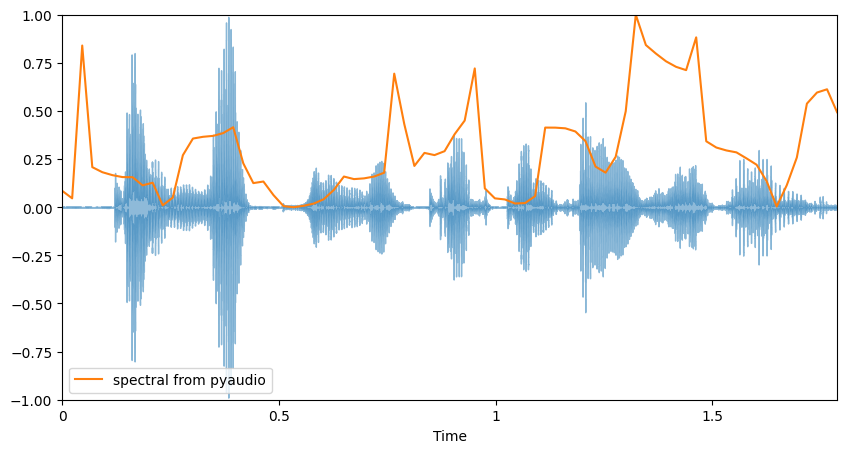

In [64]:
t = librosa.frames_to_time(range(78), hop_length=512)

plt.figure(figsize=(10, 5))
librosa.display.waveshow(audio1, alpha=0.5)
plt.plot(t, spectral_ent_norm, label='spectral from pyaudio')
plt.ylim((-1, 1))
plt.xlim((t[0],t[-1]))
plt.legend()
plt.show()

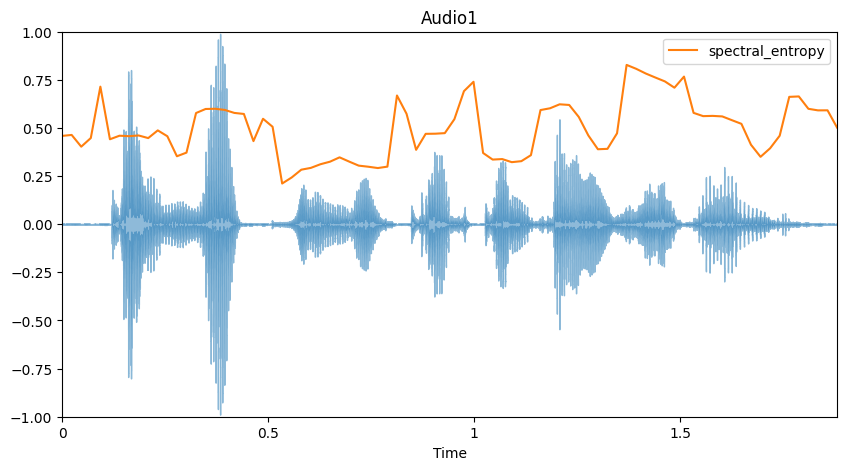

In [65]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy'], 'Audio1')

Have similar shapes but the one from antropy makes more sense compared to other features from librosa. Here we can use padding; in PyAudioaAnalysis no option for padding -> use antropy

In [236]:
def shannon_entropy(y, base=None):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    entropy_contour = [entropy(np.histogram(frame, bins=len(frame), density=True)[0], base=base) for frame in frames]
    return normalize(entropy_contour)

In [67]:
def shannon_entropy2(y, base=None):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    entropies = []
    
    for frame in frames: 
        hist, bin_edges = np.histogram(frame, bins=len(frame), density=True)
        probs = hist * np.diff(bin_edges)
        entropies.append(entropy(probs, base=base))
    
    return entropies

not necessary; already works with first version! Have almost completely same numbers/results!

"With an appropriate normalization, the power spectrum of an audio signal can be interpreted as a probability density." - https://www.researchgate.net/publication/231167623_On_the_Generalization_of_Shannon_Entropy_for_Speech_Recognition
-> use power spectrum as probability density of the audio signal!! Histogram is also working! Can compare both!

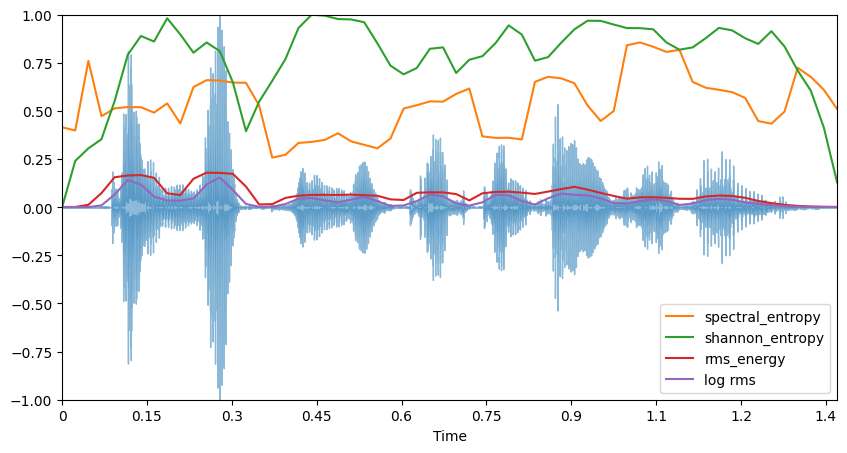

In [235]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'rms', 'rms_log'])

In [69]:
def threshold_entropy(y):
    thrd = np.mean(np.abs(y)) # threshold is the mean of the absolute signal 

    filtered_signal = np.array([1 if np.abs(val) >= thrd else 0 for val in y])
    frames = frames_gen(filtered_signal)
    frames = np.transpose(frames)
    return [np.mean(frame) for frame in frames]

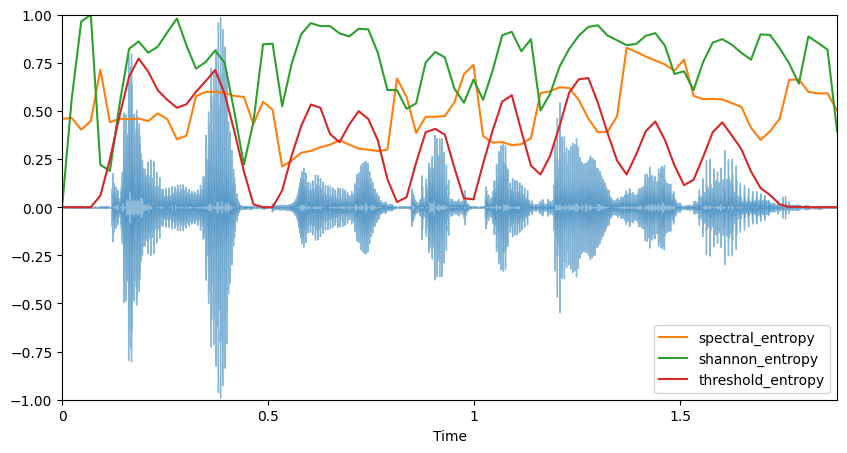

In [70]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy'])

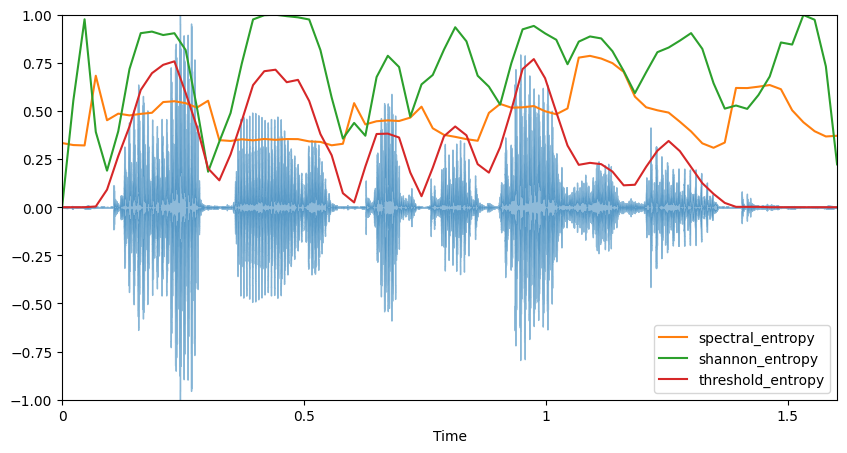

In [71]:
feature_visualization(audio2, sample_rate2, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy'])

In [72]:
def threshold_entropy2(y): # as version 2
    thrd = 0.2 * np.max(np.abs(y))

    filtered_signal = np.array([1 if np.abs(val) >= thrd else 0 for val in y])
    frames = frames_gen(filtered_signal)
    frames = np.transpose(frames)
    return [np.mean(frame) for frame in frames]

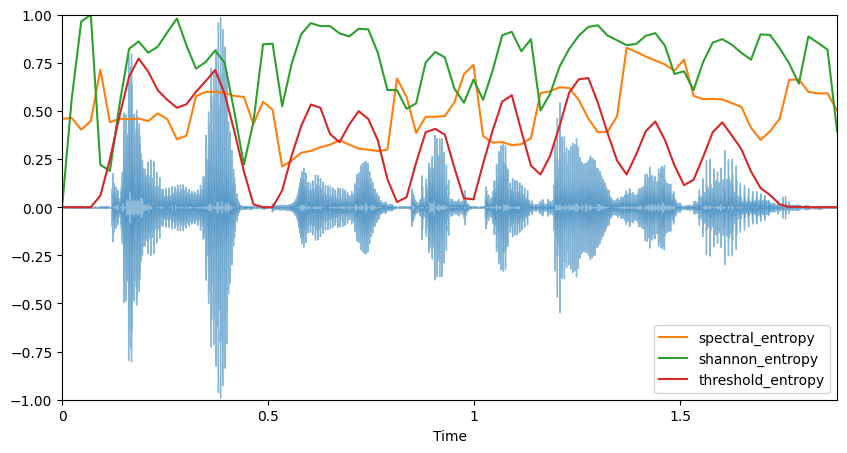

In [73]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy'])

In [275]:
def log_energy_entropy(y):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    # infinity is replaced by the largest finite floating point values representable
    log_entropy = np.nan_to_num([np.sum(np.log(np.square(frame))) for frame in frames]) 
    return normalize(log_entropy)

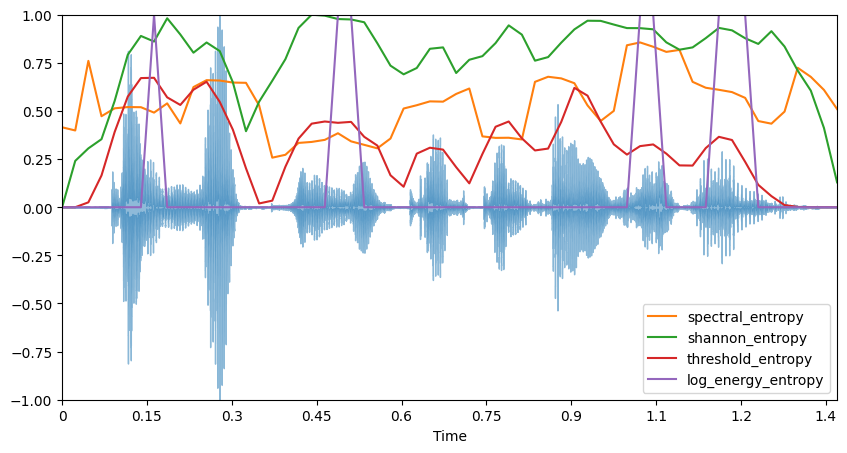

In [277]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'threshold_entropy', 
                                             'log_energy_entropy'])

In [243]:
def sure_entropy(y, threshold=0.05):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    sure_ent = []
    
    for frame in frames: 
        hist, bin_edges = np.histogram(frame, bins=len(frame), density=True)
        probs = hist * np.diff(bin_edges)
        sure_ent.append(np.sum(np.minimum(probs, threshold)))

    return normalize(sure_ent)

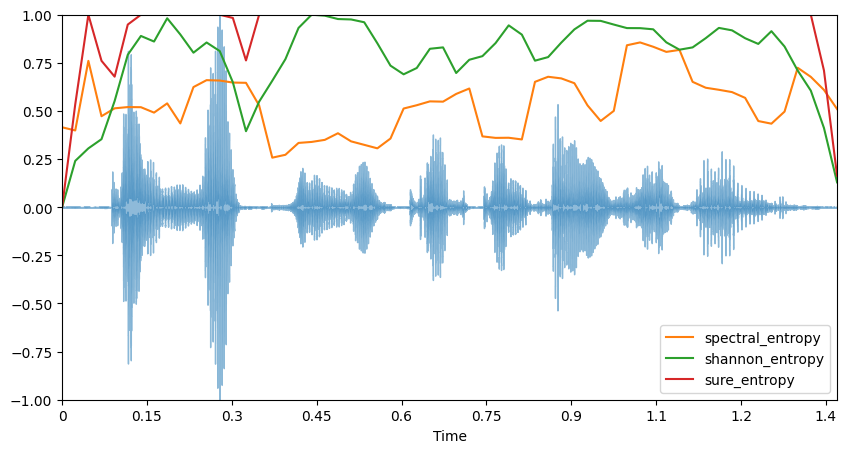

In [244]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'sure_entropy'])

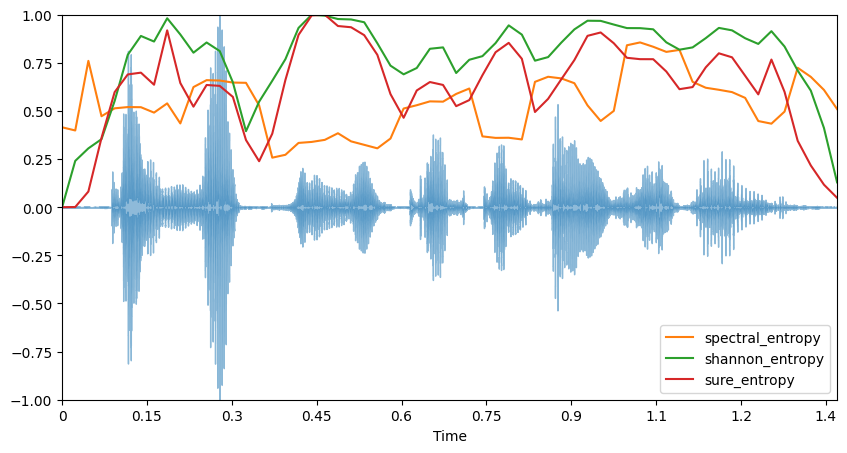

In [245]:
feature_visualization(audio1, sample_rate1, ['spectral_entropy', 'shannon_entropy', 'sure_entropy'], sure_threshold=0.0005)

# Statistical Features

In [81]:
def freq_statistics(y):
    """
    computes statistics
    """
    freqs = np.fft.fftfreq(y.size)
    
    mean = np.mean(freqs)
    median = np.median(freqs)
    std = np.std(freqs) 
    var = np.var(freqs)
    maxi = np.amax(freqs) 
    mini = np.amin(freqs) 
    
    return [mean, median, std, var, maxi, mini]

In [82]:
freq_statistics(audio1)

[9.336514911915691e-18,
 0.0,
 0.2886751345124288,
 0.08333333328576888,
 0.4999880545667391,
 -0.4999880545667391]

In [83]:
freq_statistics(audio2)

[1.07994336263462e-17,
 0.0,
 0.28867513448046883,
 0.08333333326731678,
 0.49998592698922006,
 -0.49998592698922006]

In [84]:
freq_statistics(audio3)

[-4.6925982853092583e-17,
 0.0,
 0.28867513452669225,
 0.08333333329400387,
 0.4999891377549912,
 -0.4999891377549912]

# Preprocessing 
In [1]: noise filtering & normalization before feature extraction; in others: do not mention pre-processing -> only apply normalization or not at all because no big difference!?

In [98]:
audio2_norm = librosa.util.normalize(audio2)

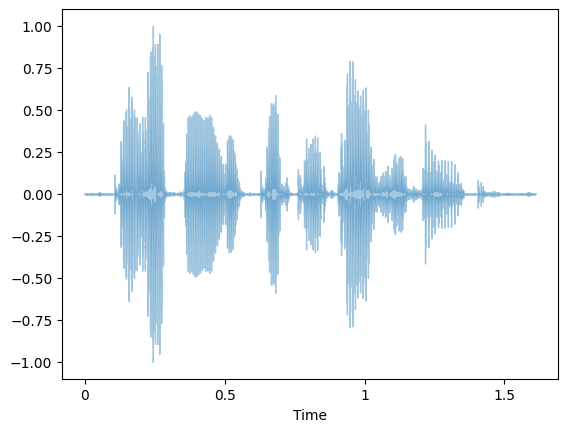

In [99]:
librosa.display.waveshow(audio2_norm, sr=sample_rate2, alpha=0.4)

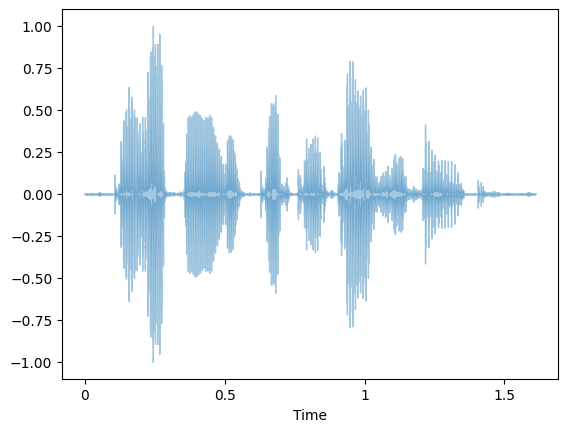

In [100]:
librosa.display.waveshow(audio2, sr=sample_rate2, alpha=0.4)

In [101]:
audio2_norm==audio2

array([False, False, False, ..., False, False,  True])

In [102]:
audio2_norm[10]

0.0004349502

In [103]:
audio2[10]

0.00043515034

In [108]:
audio2.max()

0.94020975

In [109]:
audio2_norm.max()

0.9397773

In [110]:
audio1.max()

0.9999695

In [111]:
audio1_norm.max()

1.0

# LPC

In [170]:
def lpc(y, order=4):
    return librosa.lpc(y, order=order)

In [127]:
lpc(audio1).shape

(6,)

In [248]:
def visualize_lpc(y, order):
    """
    from https://librosa.org/doc/main/generated/librosa.lpc.html
    """
    a = librosa.lpc(y, order=order)
    b = np.hstack([[0], -1 * a[1:]])
    y_hat = scipy.signal.lfilter(b, [1], y)
    fig, ax = plt.subplots()
    ax.plot(y)
    ax.plot(y_hat, linestyle='--')
    ax.legend(['y', 'y_hat'])
    ax.set_title('LP Model Forward Prediction')
    plt.show()

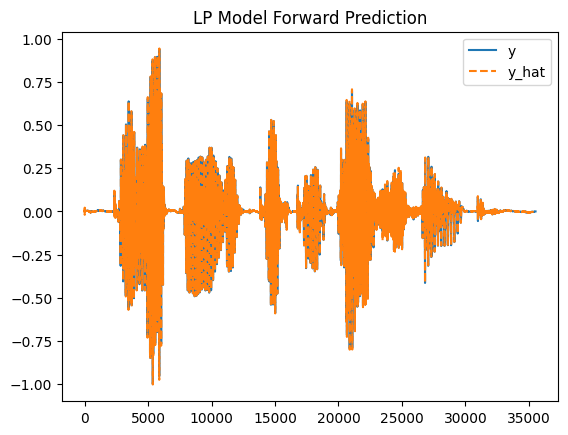

In [249]:
visualize_lpc(audio2, 16)

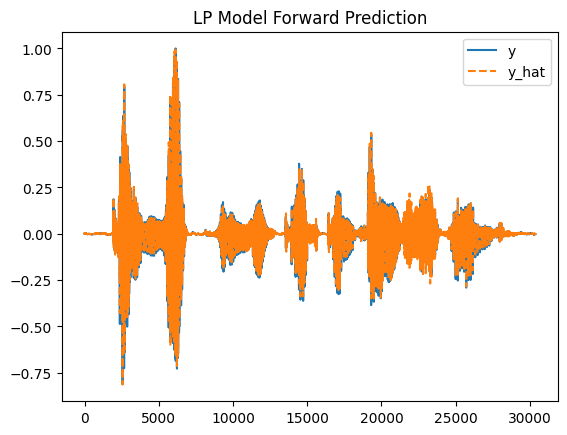

In [161]:
visualize_lpc(audio1, 16)

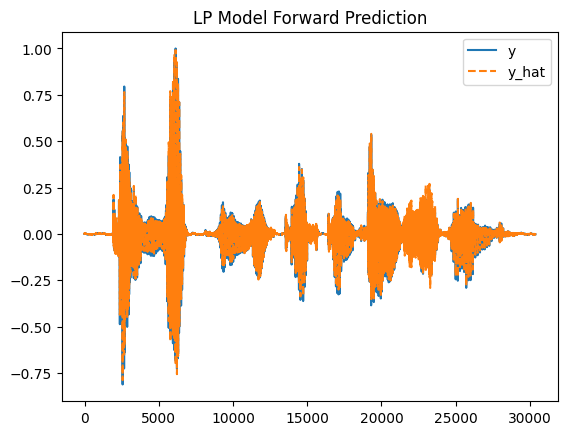

In [168]:
visualize_lpc(audio1, 4)

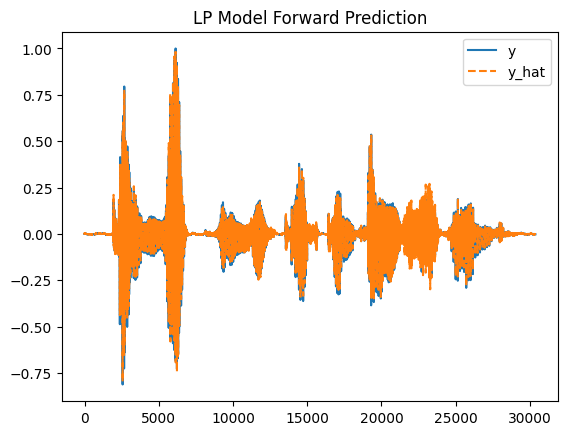

In [169]:
visualize_lpc(audio1, 5)

-> quite estimation with order=4 achieved!

# Energy

In [227]:
def energy(y):
    frames = frames_gen(y)
    frames = np.transpose(frames)
    
    ener = [np.sum(np.square(frame)) for frame in frames]
    
    return normalize(ener)

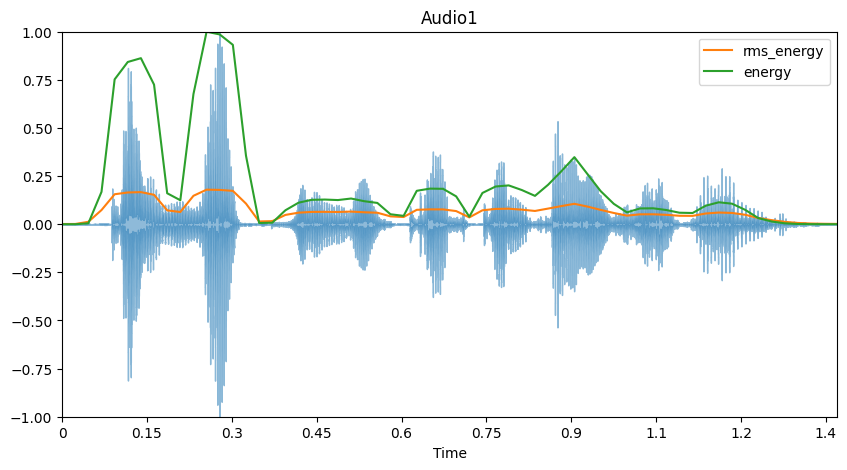

In [226]:
feature_visualization(audio1, sample_rate1, ['energy', 'rms'], 'Audio1')

In [222]:
def normalize(x):
    return sklearn.preprocessing.MinMaxScaler().fit_transform(np.array(x).reshape(-1,1))

In [214]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [185]:
x

MinMaxScaler(feature_range=[0.0026489068, 0.003430198, 0.32241118, 11.104954,
                            49.6757, 55.64046, 56.9451, 47.869926, 10.622198,
                            8.232104, 44.638214, 66.017334, 65.08752, 61.516994,
                            23.495008, 0.4199703, 0.5253811, 4.782196,
                            7.3873525, 8.365075, 8.462575, 8.287053, 8.8152895,
                            7.8945594, 7.3023267, 3.4174263, 2.8691852,
                            11.461156, 12.21264, 12.14604, ...])

In [220]:
from sklearn.preprocessing import MinMaxScaler
>>> data = np.array([-1, -0.5, 0, 1]).reshape(-1, 1)
>>> scaler = MinMaxScaler()
>>> print(scaler.fit(data))

MinMaxScaler()


In [221]:
scaler.transform(data)

array([[0.  ],
       [0.25],
       [0.5 ],
       [1.  ]])

# Fundamental Frequency

In [279]:
def f0_comp(y, sr):
    f0, voiced_flag, voiced_prob = librosa.pyin(y=y, sr=sr, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), hop_length=512)
    f0 = np.nan_to_num(f0) # convert nan values to 0
    return f0, voiced_flag, voiced_prob

In [280]:
f0_comp(audio1, sample_rate1)

(array([  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
        141.83073393, 140.20166901, 144.30989149, 161.98237639,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 234.43211036, 202.90956259,
        173.60841241, 165.76853496, 168.66611791, 223.84553226,
        227.75828325, 233.08188076, 241.30149553,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 188.23090565, 183.93170582, 181.81906999,
        171.61434972, 139.39416681, 159.19961612, 201.74088951,
        226.44649206, 249.8109744 , 260.11871293, 258.62053938,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 113.87914162, 112.57112812, 109.36644662,
        108.73654224,  99.71184888, 102.04250286, 100.87044475,
         96.31529725,   0.        ,   0.        ,   0.        ]),
 array([False, False, False, False, Fa

When estimating the fundamental frequency with probabilistic YIN algorithm, we can see that we only get values where the algorithm estimates voiced sections.

# Formant detection using Praat
following https://github.com/drfeinberg/PraatScripts/blob/master/Measure%20Pitch%2C%20HNR%2C%20Jitter%2C%20Shimmer%2C%20and%20Formants.ipynb

In [259]:
import parselmouth 
from parselmouth import praat

In [260]:
audio1_praat = parselmouth.Sound(audio1_path) 

In [261]:
audio1_praat

In [369]:
# compute the formants
"""
from https://www.fon.hum.uva.nl/praat/manual/Sound__To_Formant__burg____.html
Time step (s): If you set the time step to 0.0 (the standard), Praat will use a time step that is equal to 25 percent of
the analysis window length
Maximum number of formants: usually 5
Formant ceiling (Hz): is speaker-dependent! for female 5500 Hz, for male rather 5000 Hz; crucial to set this value 
correct
Window length


The sound will be resampled to a sampling frequency of twice the value of Formant ceiling -> so usually should take the 
values below but to keep consistency maybe take 8000? but then not accurate!? 

Other values are okay!?


returns: a dictionary with median of formants!
"""
def formant_analysis(y_path, gender, formant_order):
    y = parselmouth.Sound(y_path) # get the praat sound
    
    # compute the occurrences of periodic instances in the signal
    f0min=75
    f0max=600 # in the example it was 300; but here we see standard is 600 (https://www.fon.hum.uva.nl/praat/manual/Sound__To_Pitch__ac____.html)
    pointProcess = praat.call(y, "To PointProcess (periodic, cc)", f0min, f0max)
    
    # define maximal frequency depending on gender
    if gender == 'female':
        formant_ceiling = 5500
    else: 
        formant_ceiling = 5000

    formants = praat.call(y, "To Formant (burg)", 0.0025, 5, formant_ceiling, 0.025, 50) # formants definition
    
    # assign formant values with times where they make sense (periodic instances)
    numPoints = praat.call(pointProcess, "Get number of points")
    
    # define a dictionary to save the formants of the specified order and initialize with empty list
    form_dict = {}
    for order in range(1, formant_order+1):
        form_dict[order] = []

        for point in range(0, numPoints):
            point += 1
            t = praat.call(pointProcess, "Get time from index", point)
            formant = praat.call(formants, "Get value at time", order, t, 'Hertz', 'Linear')
            if str(formant) != 'nan':
                form_dict[order].append(formant)
        form_dict[order] = np.median(form_dict[order])
    
    return form_dict

In [366]:
formant_analysis(audio1_path, 'male', formant_order=4)

{1: 367.6153422440674,
 2: 1729.0118722080774,
 3: 2692.849025068226,
 4: 3718.263121661569}

In [368]:
formant_analysis(audio2_path, 'male', formant_order=4)

{1: 384.1957653830559,
 2: 1512.7309371243227,
 3: 2428.8124458639268,
 4: 3471.515166836066}

In [370]:
formant_analysis(audio3_path, 'male', formant_order=4)

{1: 478.72662870338615,
 2: 1559.1466604917346,
 3: 2614.72149562139,
 4: 3591.4016972489453}